In [36]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt   
import seaborn as sns  

In [37]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")


In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
data.shape

(1338, 7)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
pd.get_dummies(data).sum().round(2)

age                    52459.00
bmi                    41027.62
children                1465.00
charges             17755824.99
sex_female               662.00
sex_male                 676.00
smoker_no               1064.00
smoker_yes               274.00
region_northeast         324.00
region_northwest         325.00
region_southeast         364.00
region_southwest         325.00
dtype: float64

In [43]:
data = pd.get_dummies(data)

In [44]:
from sklearn.model_selection import train_test_split

num_variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# We divide the dataset into training and test samples
X = data.drop("charges", axis = 1)
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [46]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

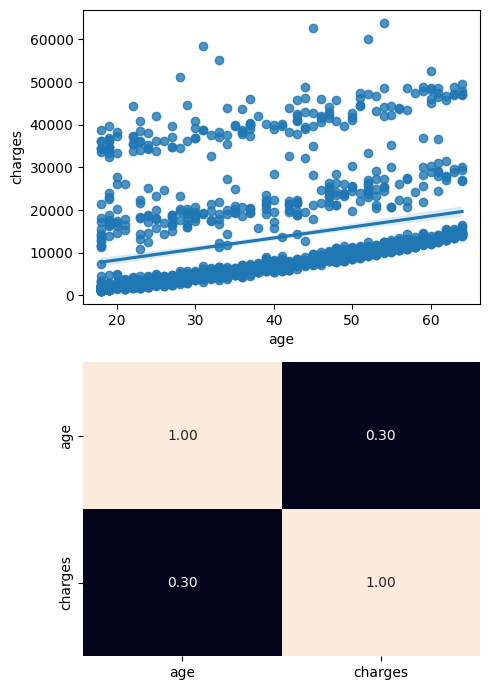

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))


sns.regplot(ax = axis[0], data = data, x = "age", y = "charges")
sns.heatmap(data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

In [48]:
X_train = data.drop(["charges"], axis = 1)
y_train = data["charges"]
X_test = data.drop(["charges"], axis = 1)
y_test = data["charges"]

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
print(f"Intercept (a): {(model.intercept_).round(2)}")
print(f"Coefficients (b): {(model.coef_).round(2)}")

Intercept (a): -666.94
Coefficients (b): [   256.86    339.19    475.5      65.66    -65.66 -11924.27  11924.27
    587.01    234.05   -448.01   -373.04]


In [63]:
y_pred = model.predict(X_test)
y_pred

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757], shape=(1338,))

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 36501893.00741544
Coefficient of determination: 0.7509130345985207


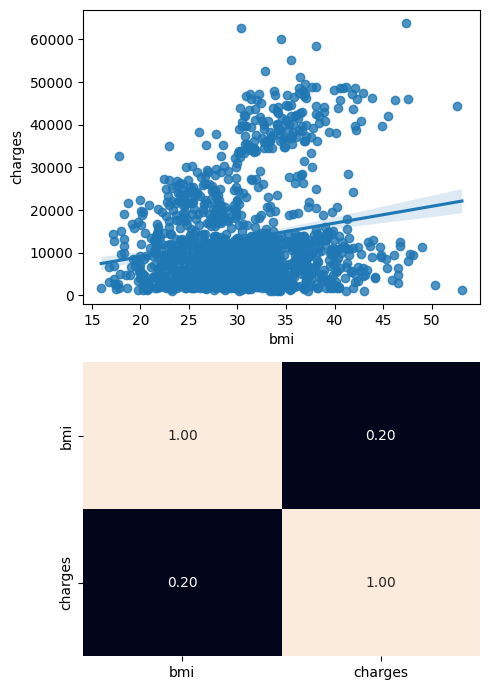

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))


sns.regplot(ax = axis[0], data = data, x = "bmi", y = "charges")
sns.heatmap(data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

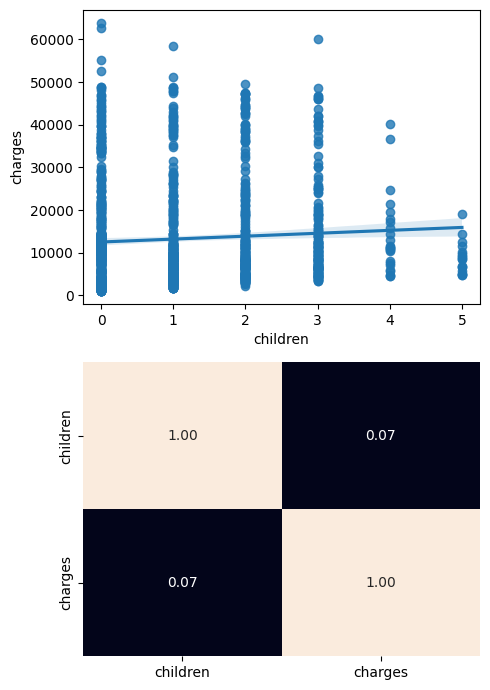

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))


sns.regplot(ax = axis[0], data = data, x = "children", y = "charges")
sns.heatmap(data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

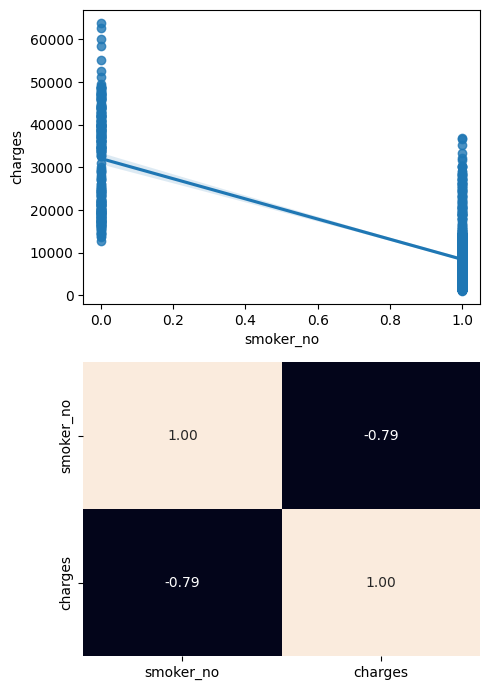

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))


sns.regplot(ax = axis[0], data = data, x = "smoker_no", y = "charges")
sns.heatmap(data[["smoker_no", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

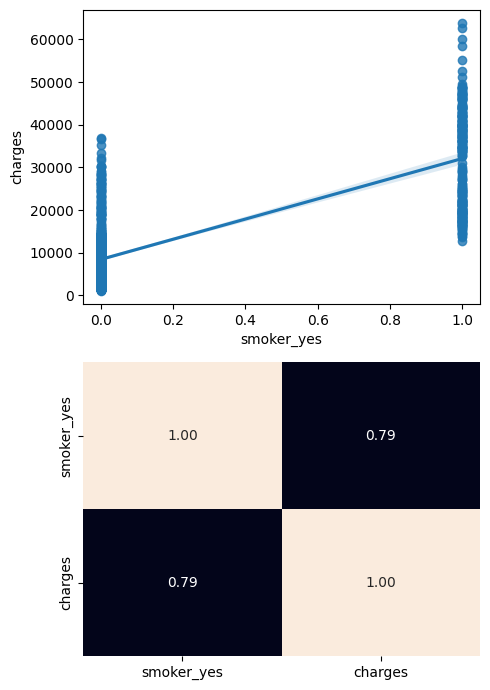

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))


sns.regplot(ax = axis[0], data = data, x = "smoker_yes", y = "charges")
sns.heatmap(data[["smoker_yes", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

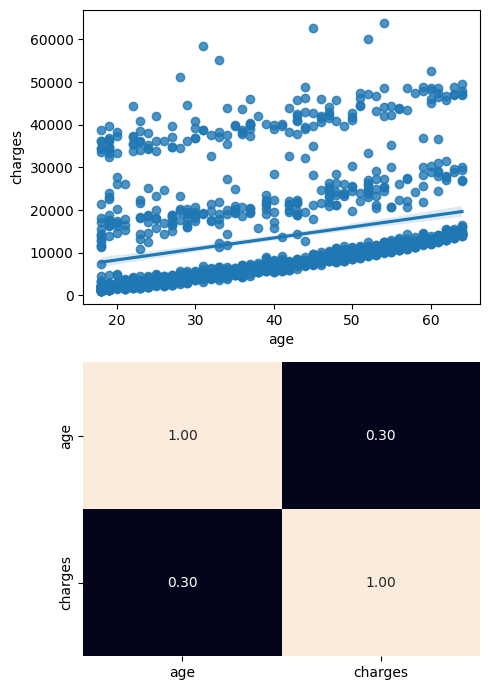

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))


sns.regplot(ax = axis[0], data = data, x = "age", y = "charges")
sns.heatmap(data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

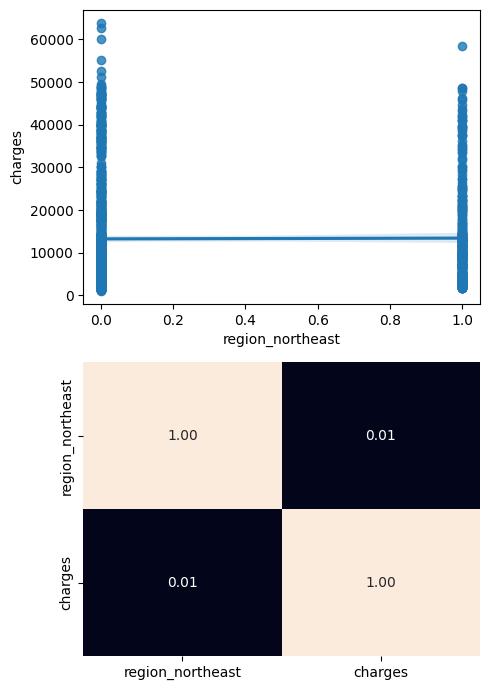

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))


sns.regplot(ax = axis[0], data = data, x = "region_northeast", y = "charges")
sns.heatmap(data[["region_northeast", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

In [59]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

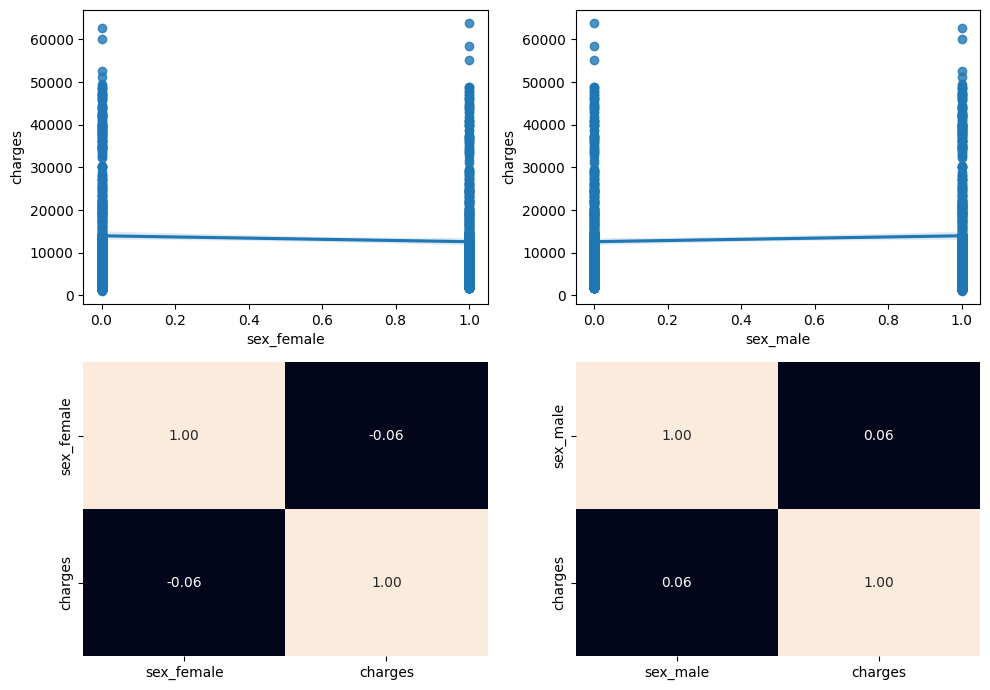

In [60]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))


sns.regplot(ax = axis[0, 0], data = data, x = "sex_female", y = "charges")
sns.heatmap(data[["sex_female", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "sex_male", y = "charges")
sns.heatmap(data[["sex_male", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

In [61]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')